In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
df = pd.read_csv("/content/Vehicle_Insurance.csv")

In [49]:
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [50]:
# Display first few rows
df.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [51]:
# Info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [52]:
# Check missing values
df.isnull().sum()

,0
id,0
Gender,0
Age,0
Driving_License,0
Region_Code,0
Previously_Insured,0
Vehicle_Age,0
Vehicle_Damage,0
Annual_Premium,0
Policy_Sales_Channel,0


In [53]:
# Summary statistics for numerical columns
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [54]:
# Data cleaning
df = df.dropna()
df = df.drop_duplicates()

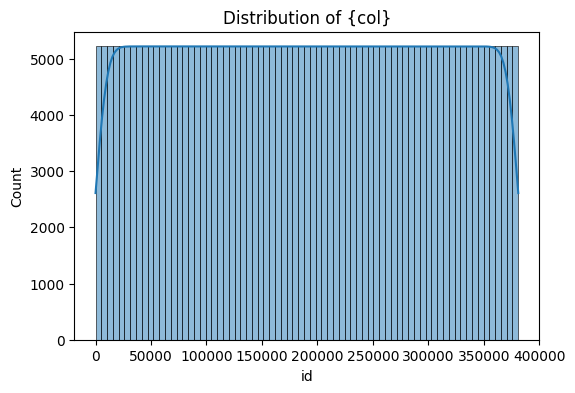

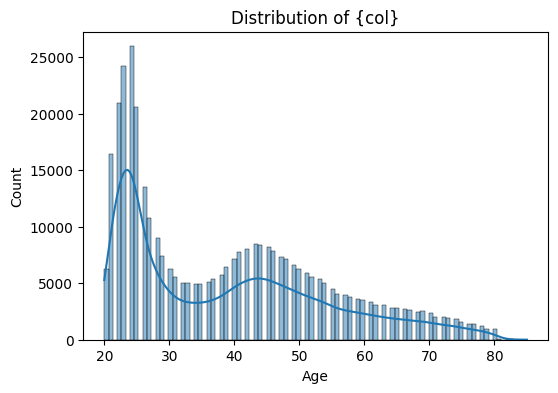

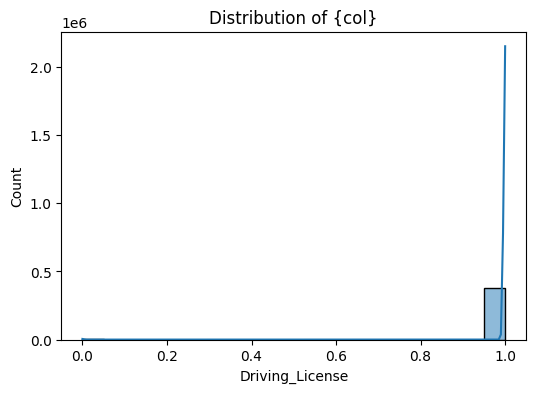

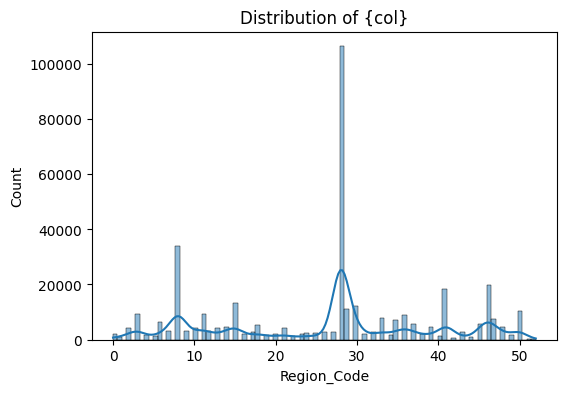

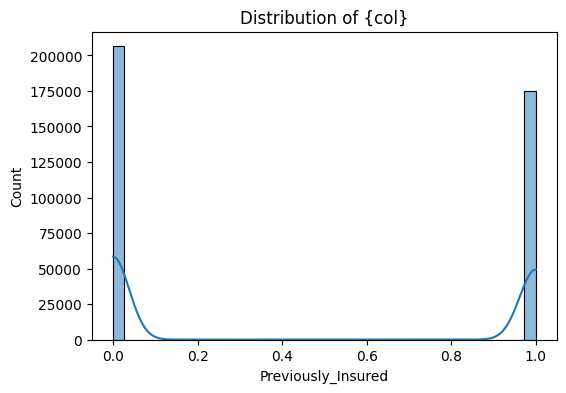

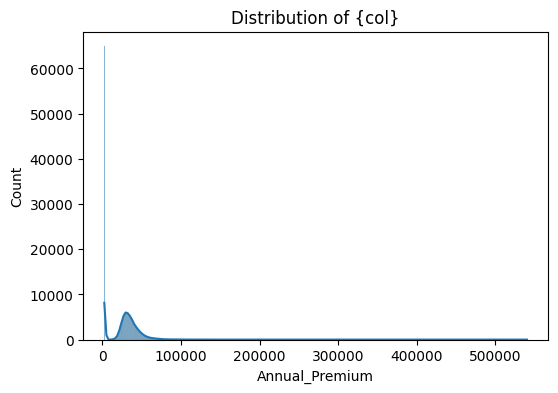

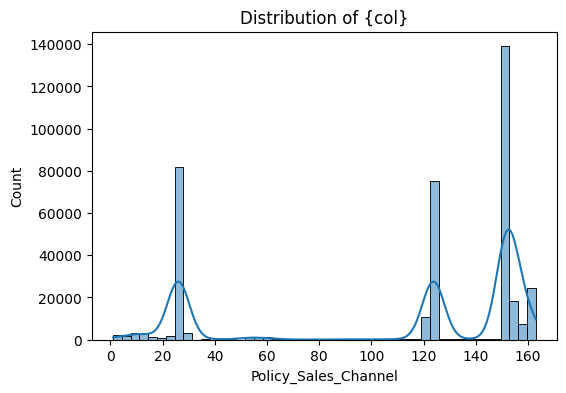

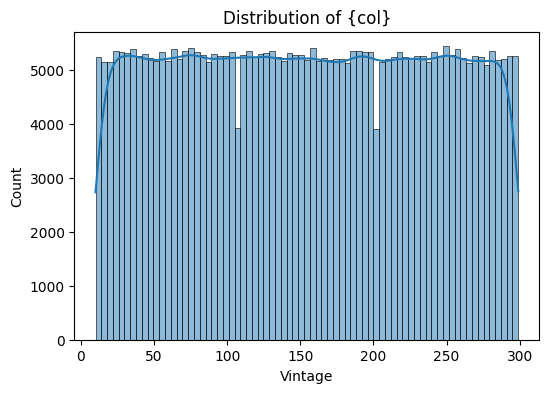

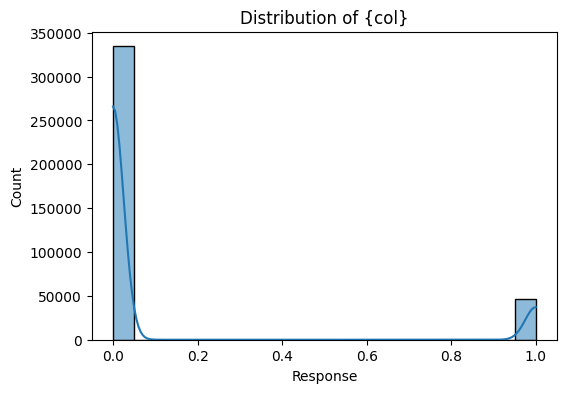

In [55]:
# Histograms for numeric columns
num_col = df.select_dtypes(include=[np.number]).columns
for col in num_col:
  plt.figure(figsize=(6,4))
  sns.histplot(df[col].dropna(), kde=True)
  plt.title("Distribution of {col}")
plt.show()

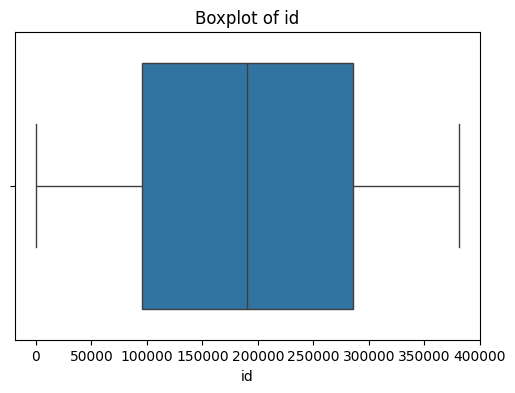

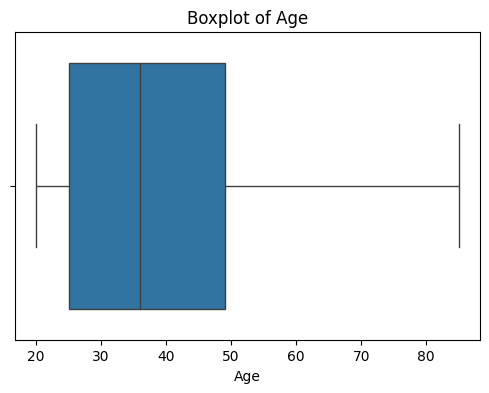

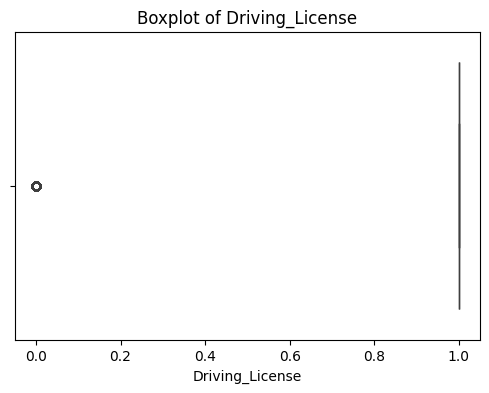

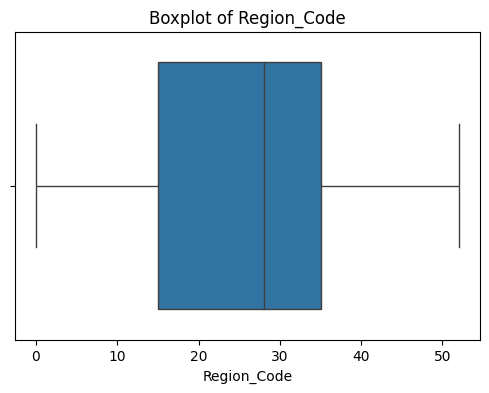

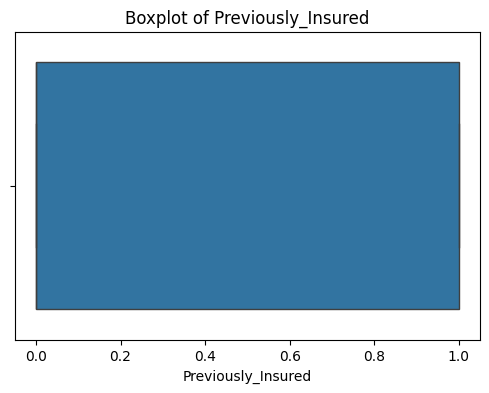

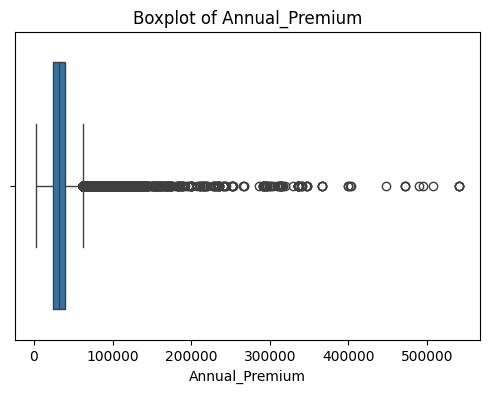

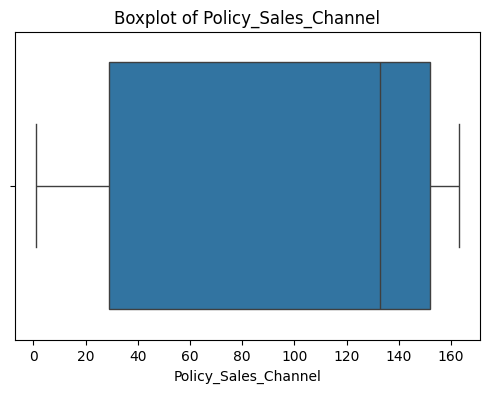

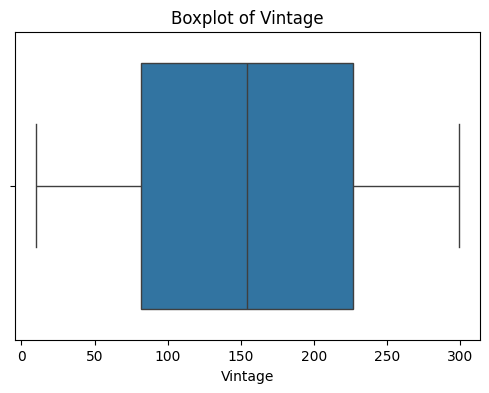

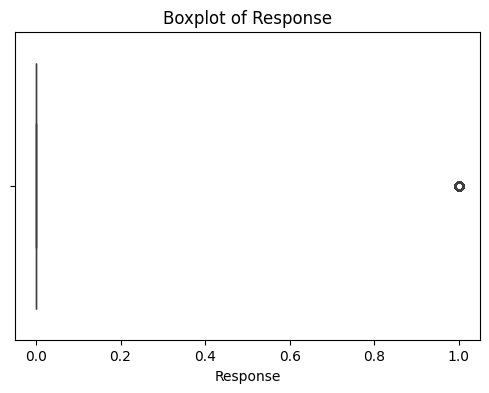

In [56]:
# Boxplots for numeric columns
for col in num_col:
  plt.figure(figsize=(6,4))
  sns.boxplot(x=df[col])
  plt.title(f"Boxplot of {col}")
  plt.show()

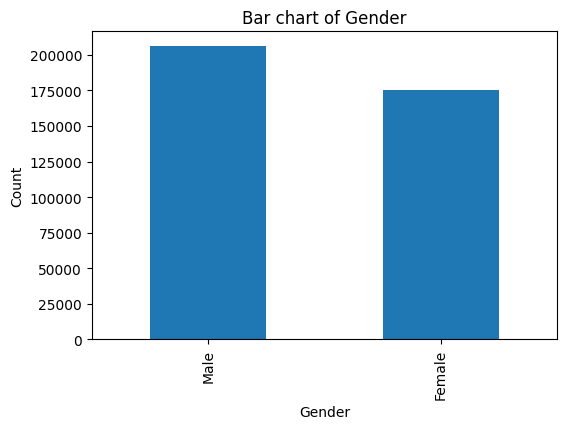

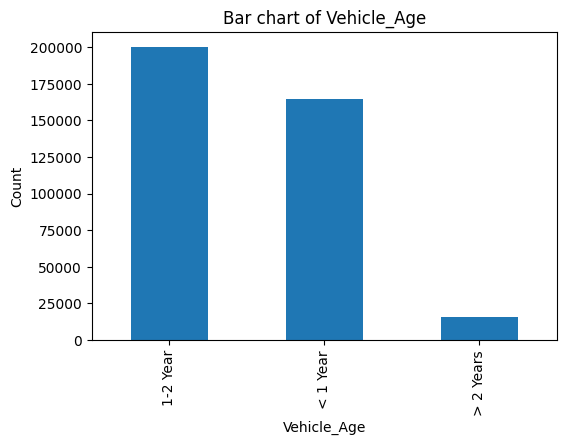

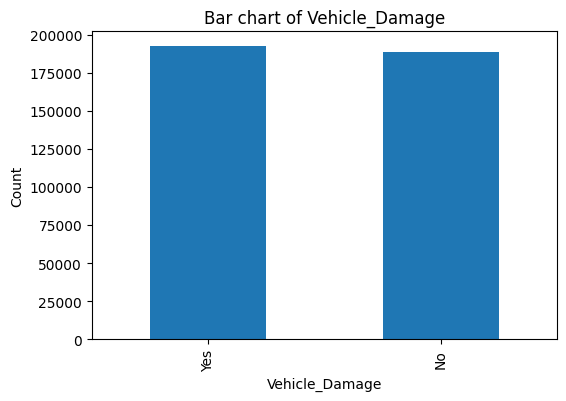

In [57]:
# Bar charts for categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
  plt.figure(figsize=(6,4))
  df[col].value_counts().plot(kind='bar')
  plt.title(f"Bar chart of {col}")
  plt.ylabel("Count")
  plt.show()

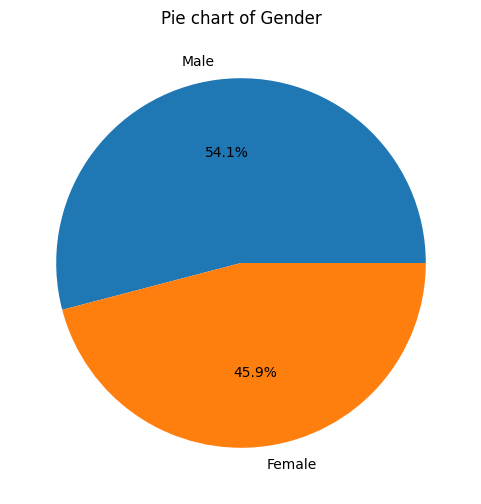

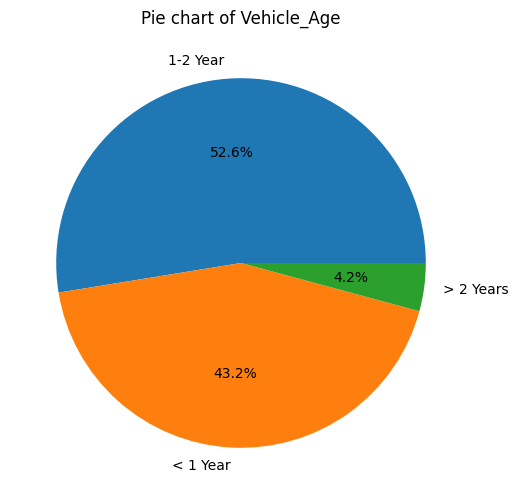

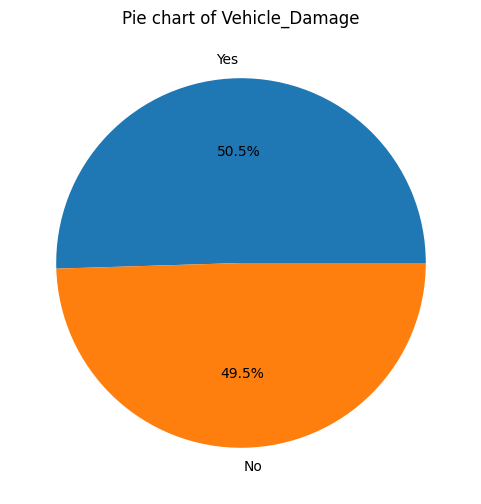

In [58]:
# Pie charts for categorical columns
for col in cat_cols:
  plt.figure(figsize=(6,6))
  df[col].value_counts().plot(kind='pie', autopct='%1.1f%%')
  plt.title(f"Pie chart of {col}")
  plt.ylabel("")
  plt.show()

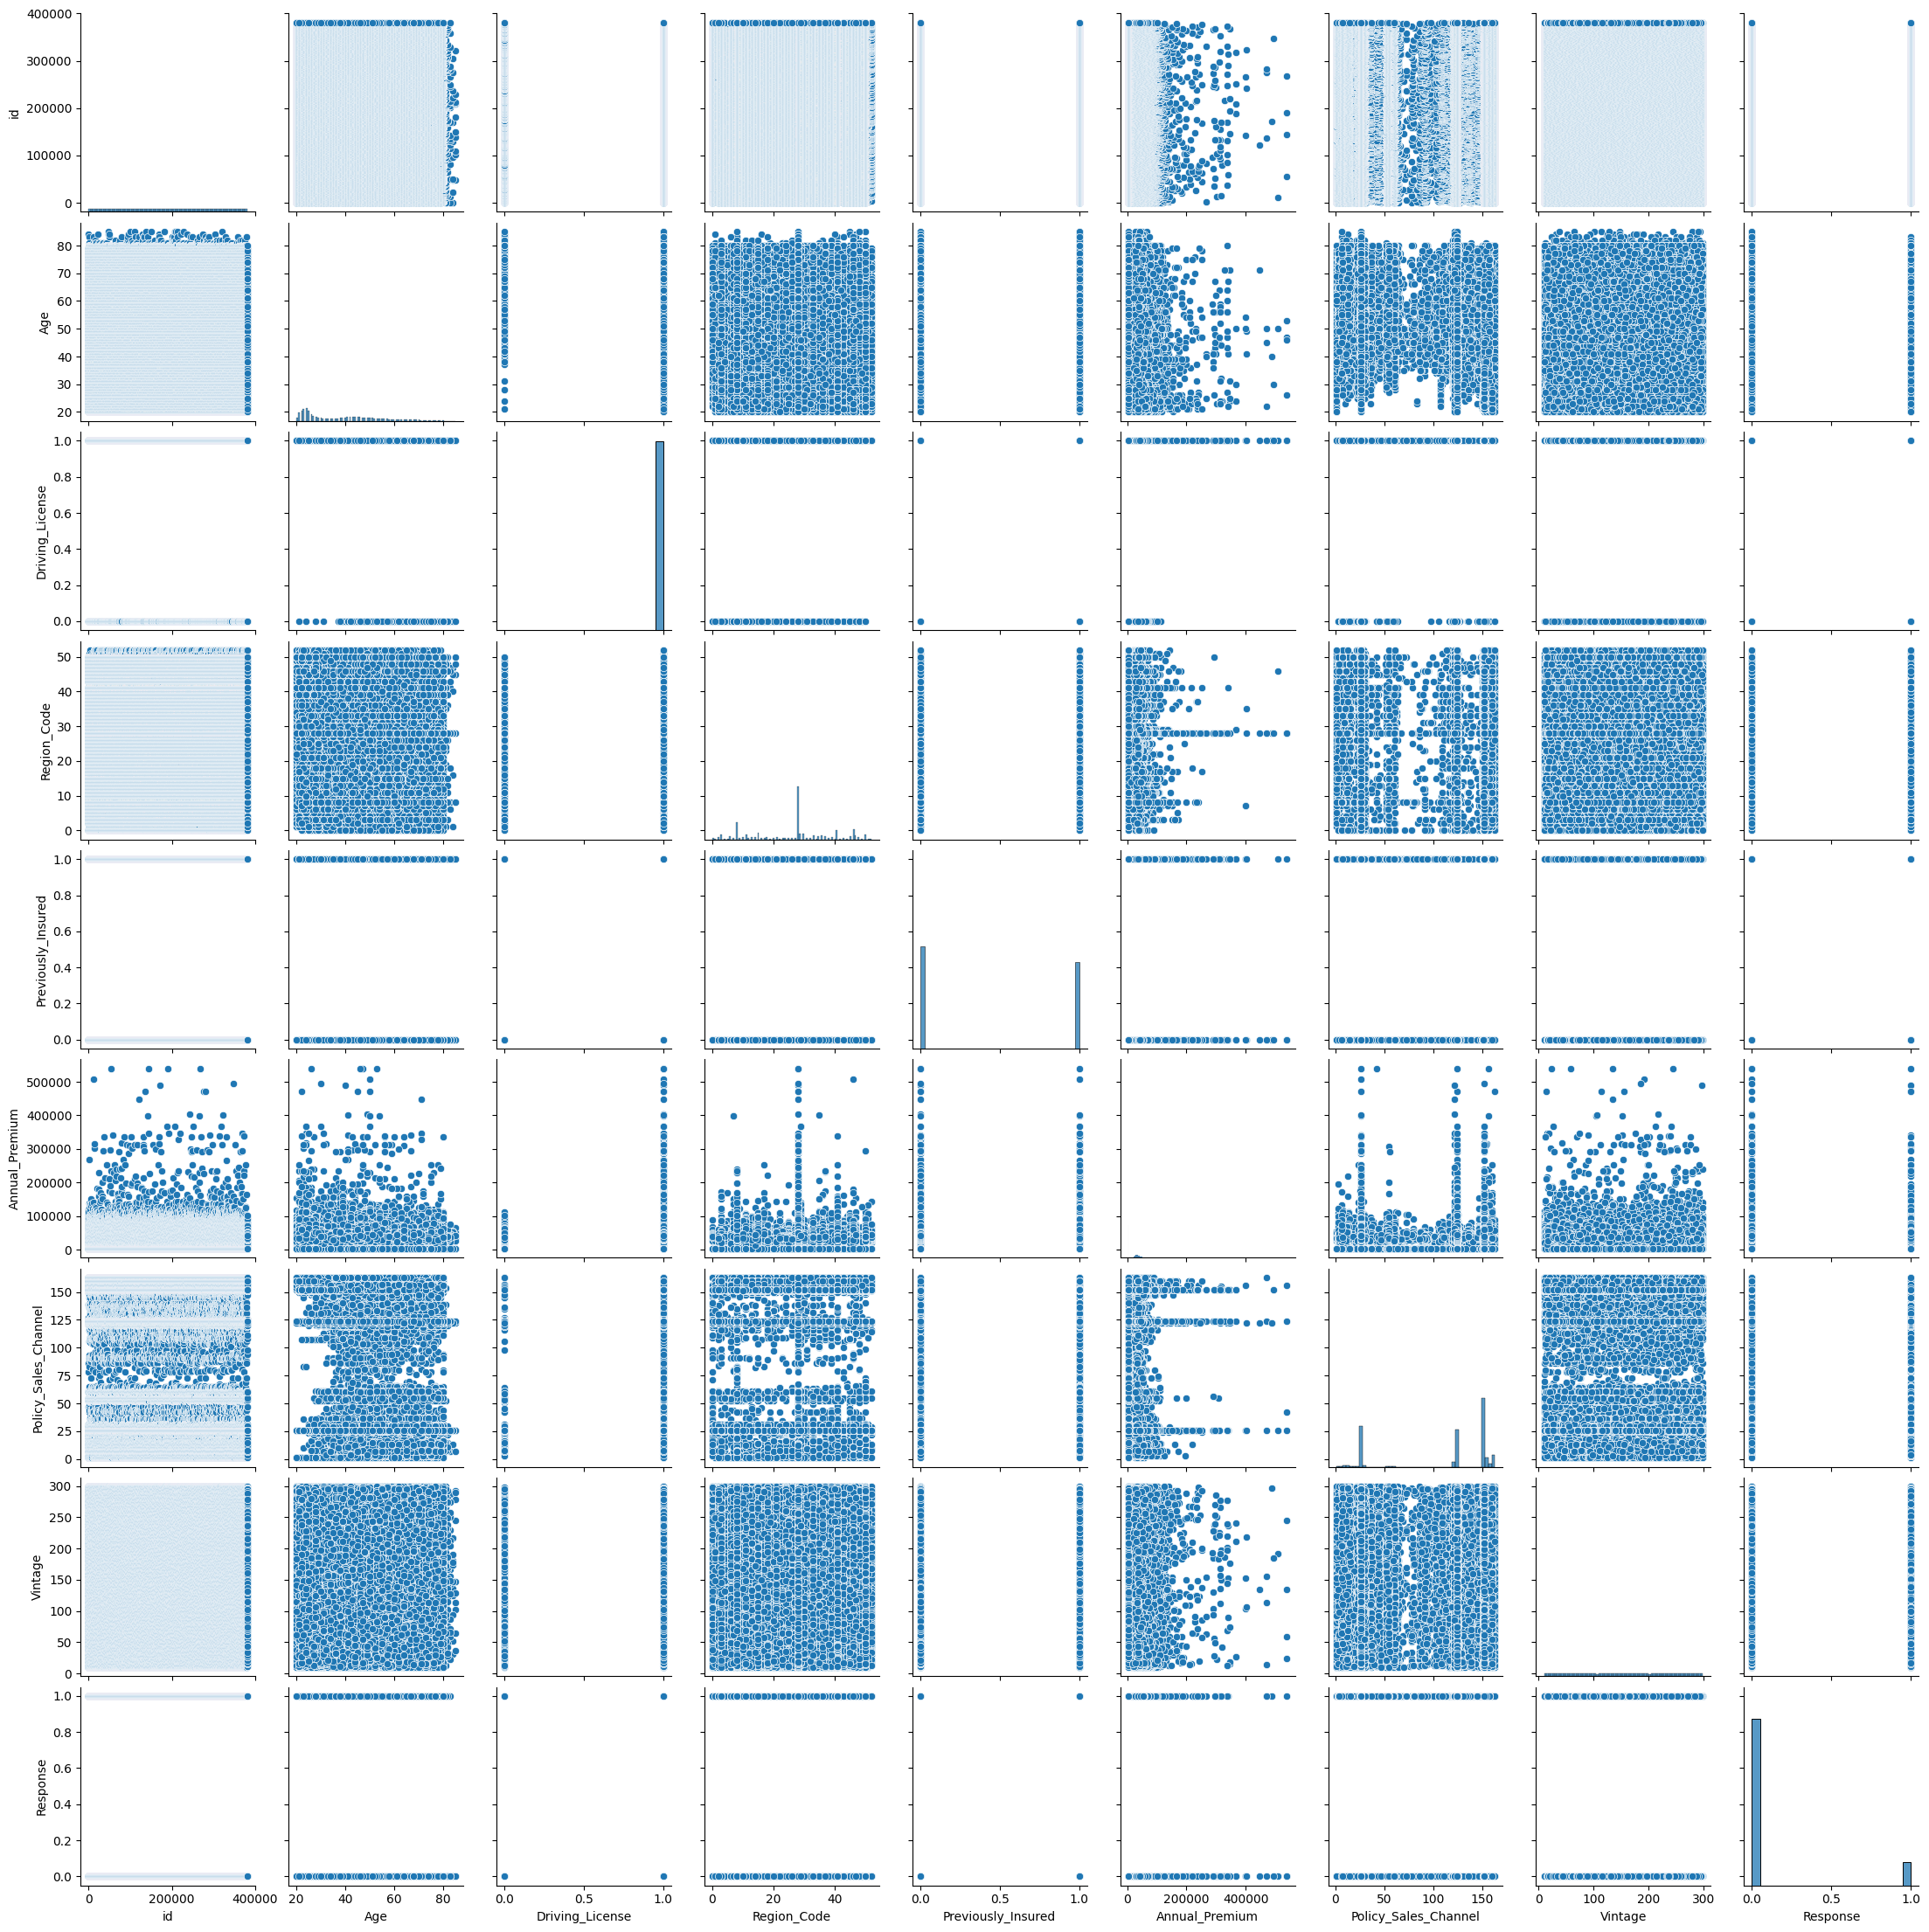

In [59]:
# Bivariate Analysis
# Scatter plots for numeric vs numeric
if len(num_col) > 1:
  sns.pairplot(df[num_col].dropna())
  plt.show()


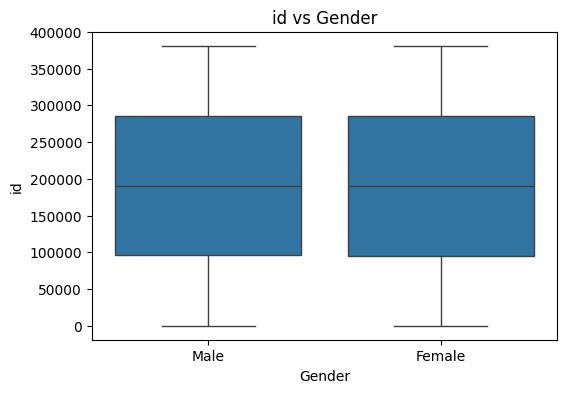

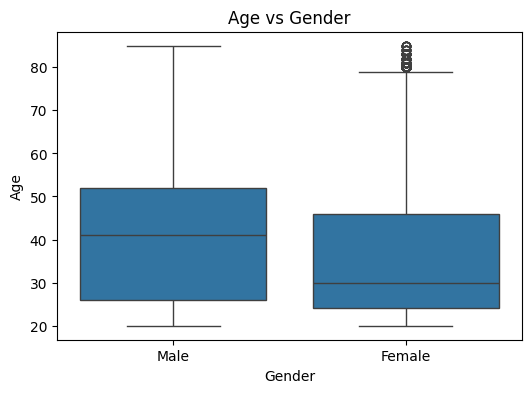

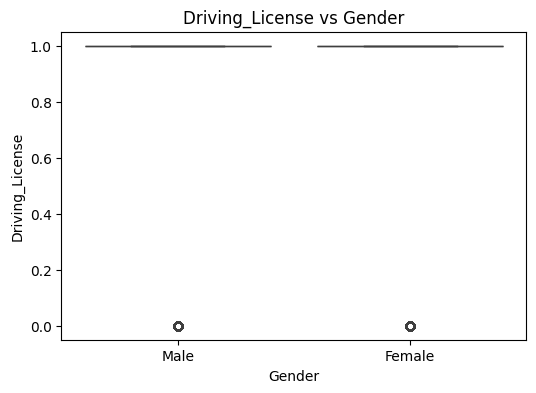

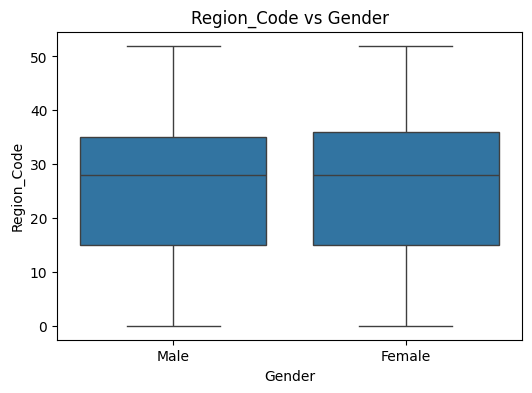

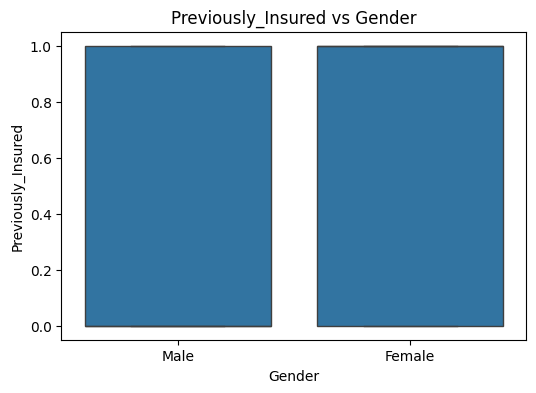

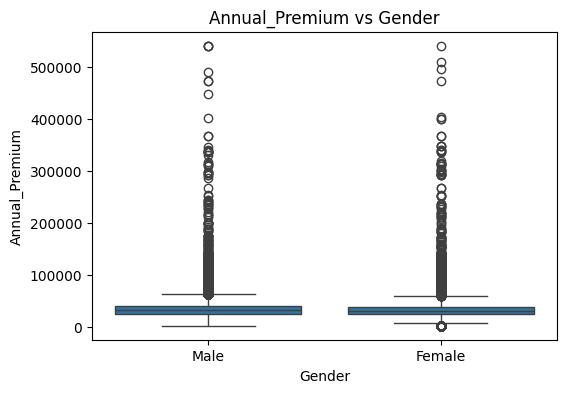

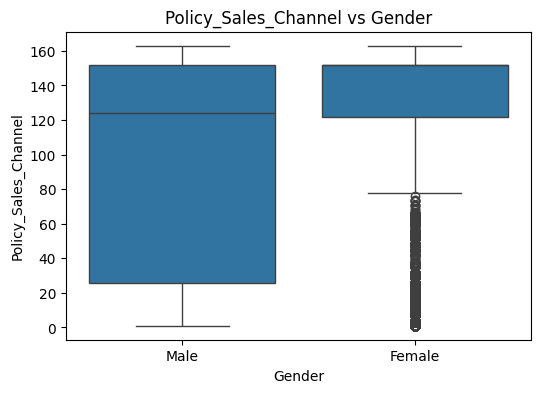

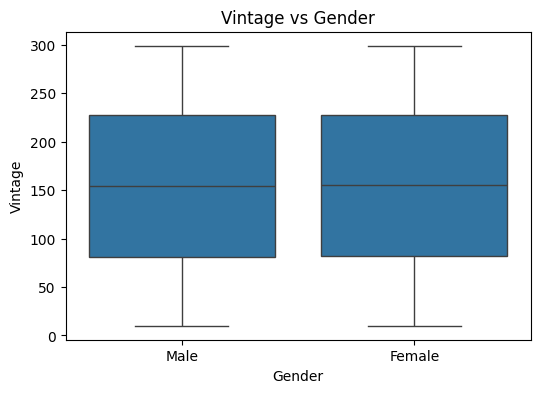

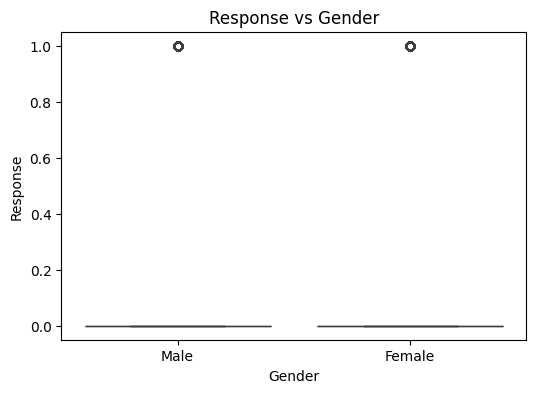

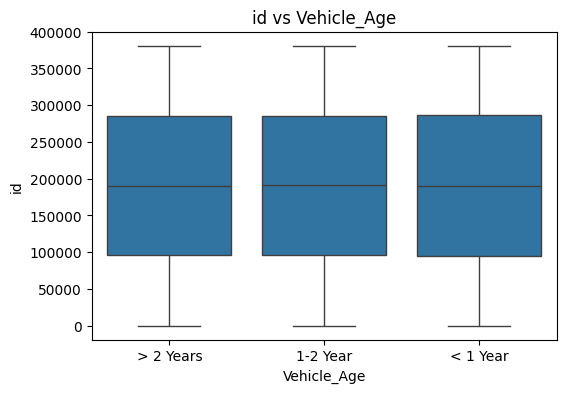

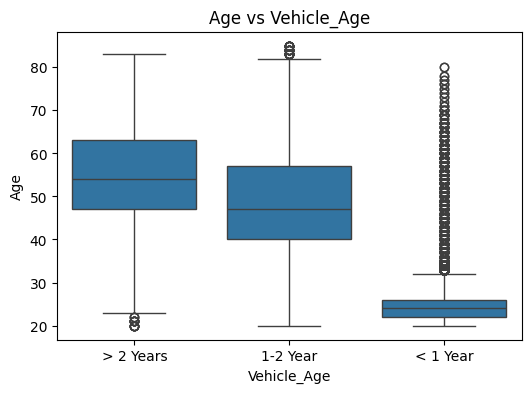

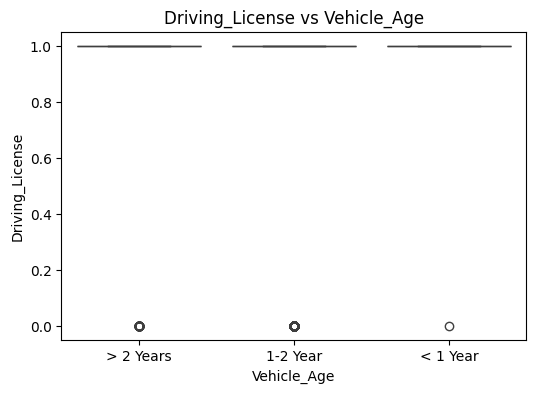

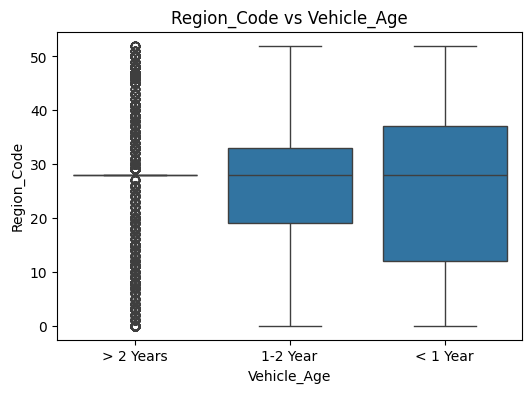

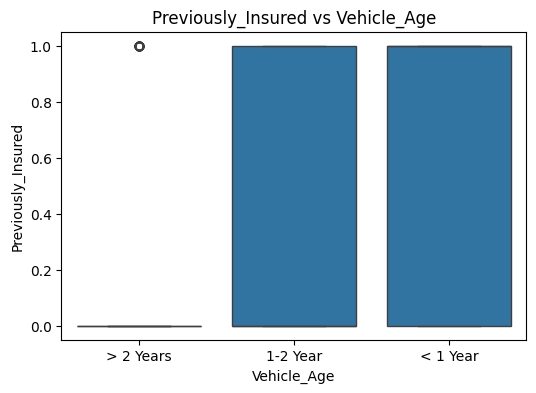

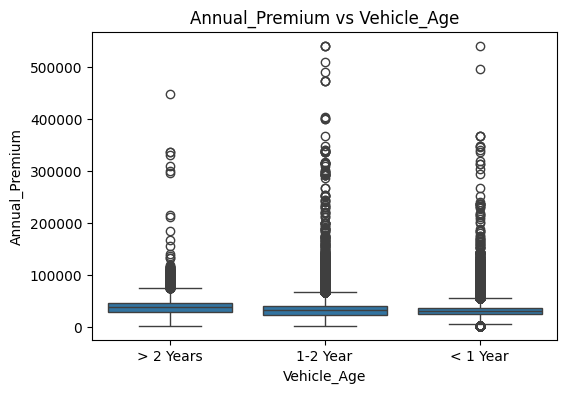

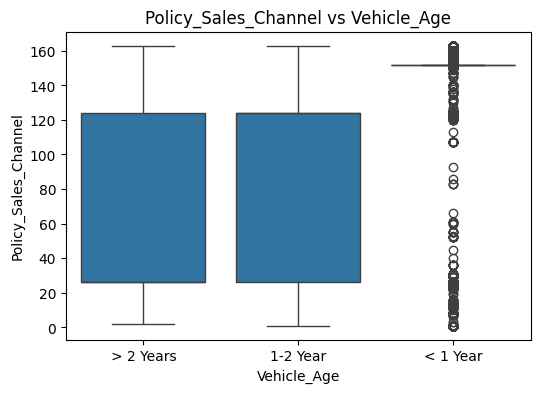

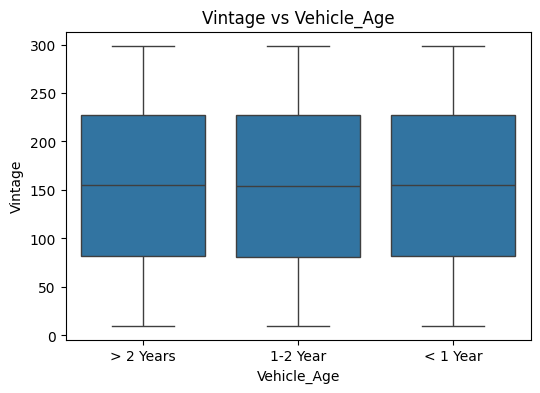

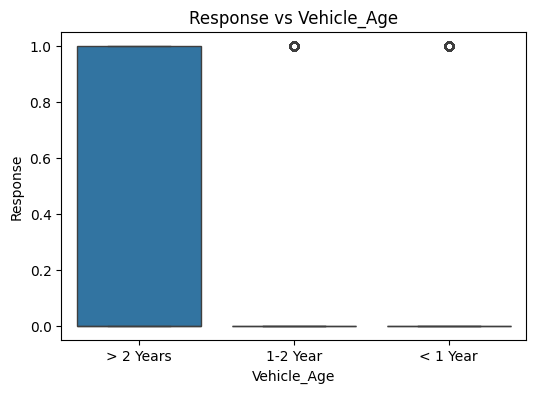

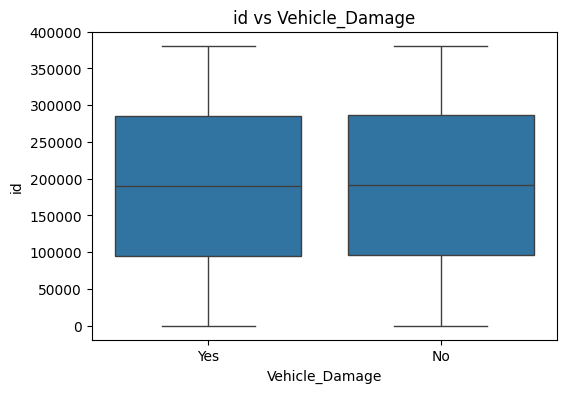

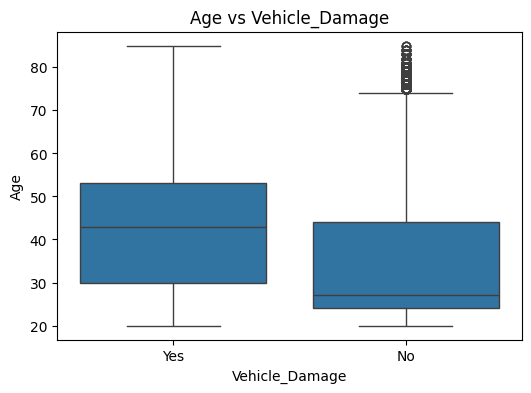

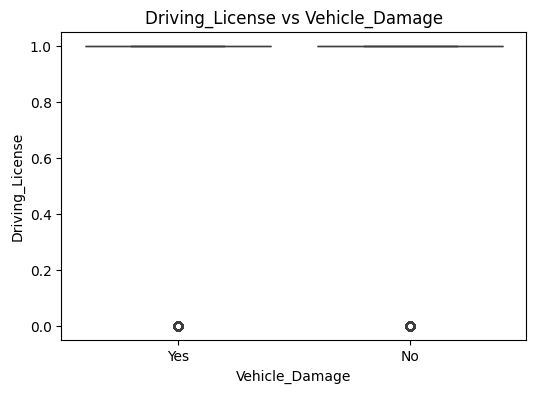

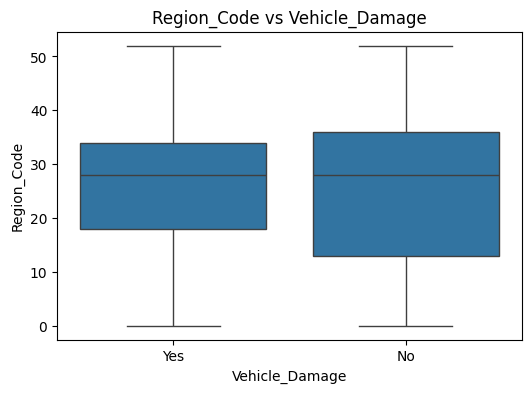

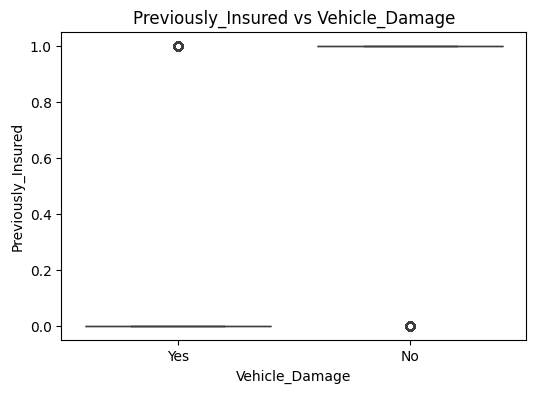

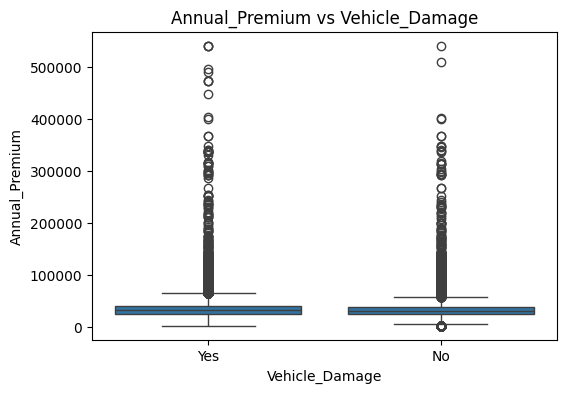

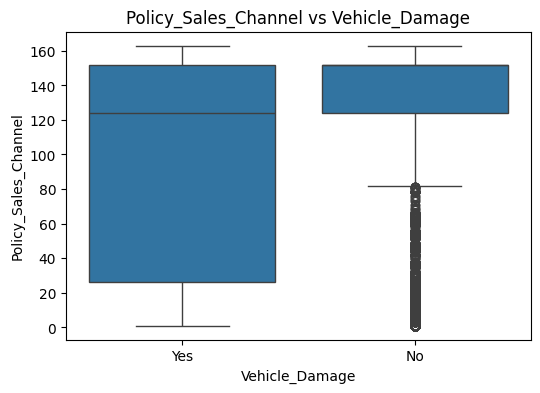

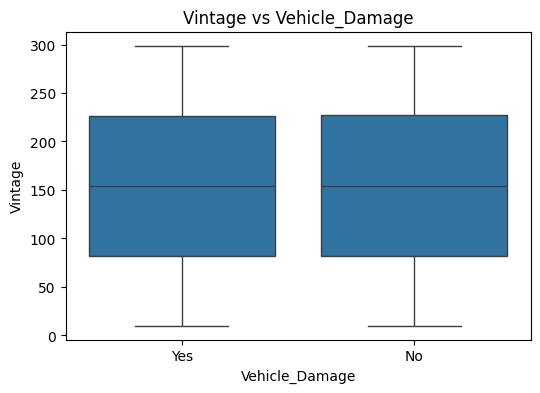

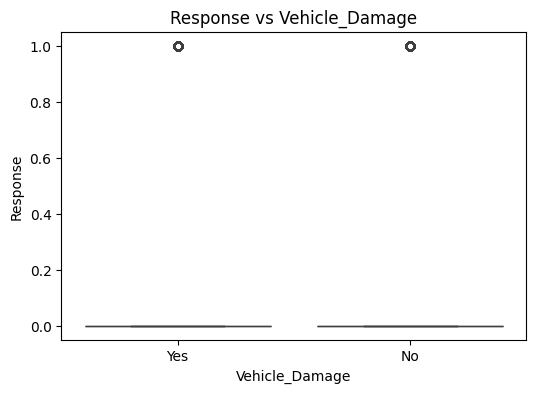

In [46]:
# Boxplots for categorical vs numeric
for cat in cat_cols:
  for num in num_col:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[cat], y=df[num])
    plt.title(f"{num} vs {cat}")
    plt.show()

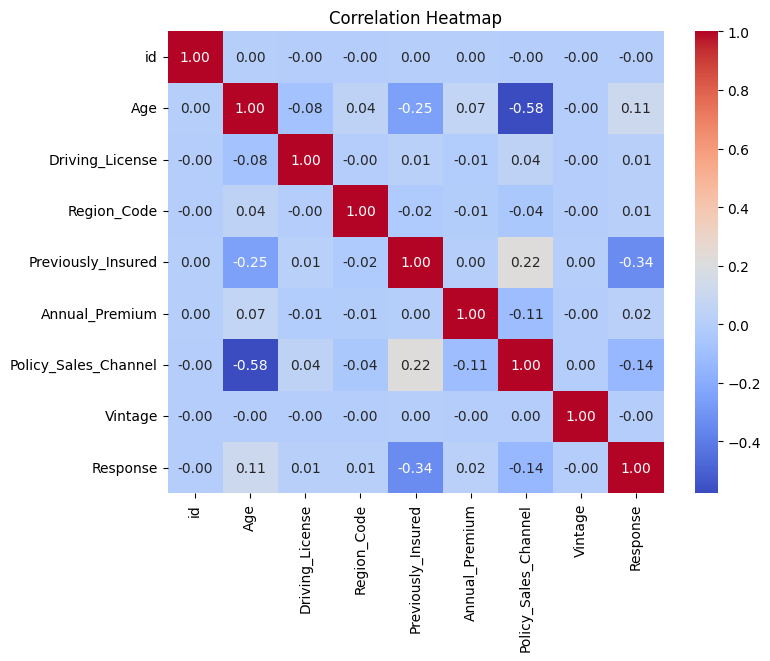

In [61]:
# Multivariate Analysis
# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[num_col].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()